In [3]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df_clean= pd.read_csv('../data_clean/data_train_clean.csv')
df_clean

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,0,5849,0.0,128.0,360.0,1,LP001002,0,1,1,0,1,0,1,0,0,0,1,0,1
1,1,4583,1508.0,128.0,360.0,1,LP001003,0,1,0,1,1,0,1,0,1,0,0,1,0
2,0,3000,0.0,66.0,360.0,1,LP001005,0,1,0,1,1,0,0,1,0,0,1,0,1
3,0,2583,2358.0,120.0,360.0,1,LP001006,0,1,0,1,0,1,1,0,0,0,1,0,1
4,0,6000,0.0,141.0,360.0,1,LP001008,0,1,1,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1,LP002978,1,0,1,0,1,0,1,0,1,0,0,0,1
610,3,4106,0.0,40.0,180.0,1,LP002979,0,1,0,1,1,0,1,0,1,0,0,0,1
611,1,8072,240.0,253.0,360.0,1,LP002983,0,1,0,1,1,0,1,0,0,0,1,0,1
612,2,7583,0.0,187.0,360.0,1,LP002984,0,1,0,1,1,0,1,0,0,0,1,0,1


In [14]:
#Loan_ID entfernen
#df_clean.drop('Loan_ID', axis = 1, inplace = True)


# DATA VISUALIZATION

In [68]:
#plt.figure(figsize = (6,4))
#sns.countplot(x =  'Loan_Status_Y', data= df_clean)
#plt.title('Loan Approval Status Ditribution')
#plt.show()

#### Credit_History (>1)--> YES

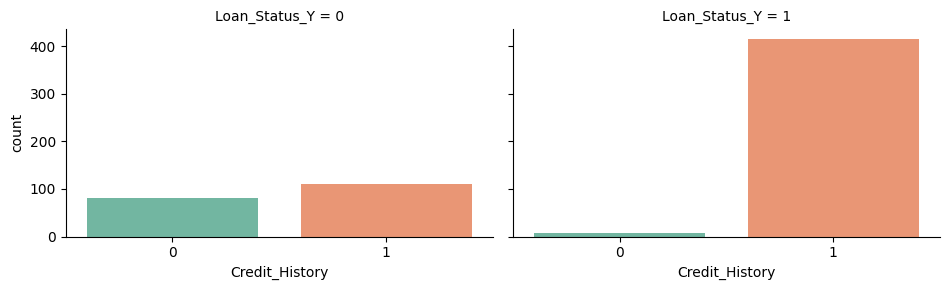

In [82]:
#Credit history
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Credit_History', palette = 'Set2')

#### Dependents( weniger Kinder zB:0 Kinder)--> hohe Wahrscheinlichkeit--> YES

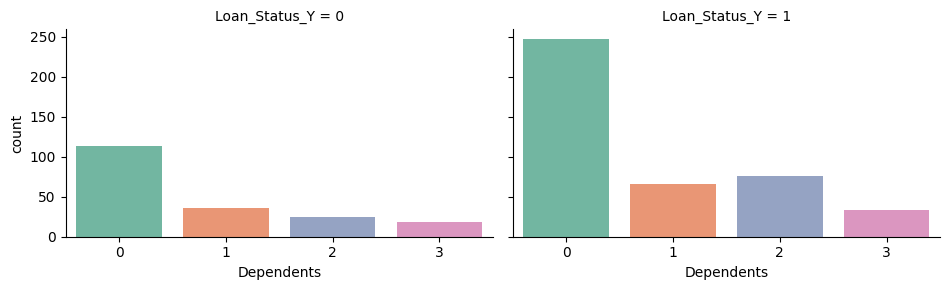

In [81]:
#Dependents
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Dependents', palette = 'Set2')

#### Gender --> Männer sind prioriesiert--> YES

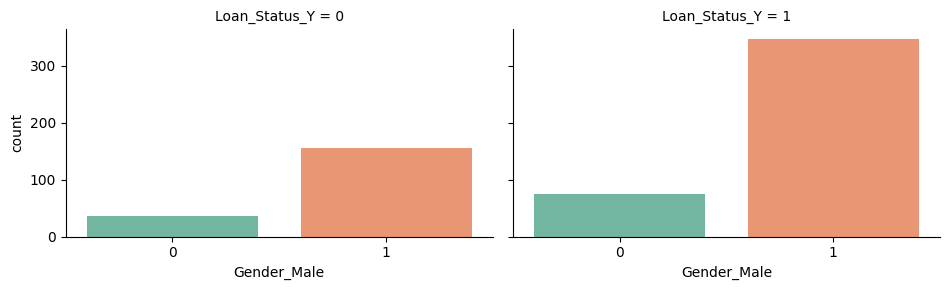

In [87]:
#Gender_Male
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Gender_Male',palette = 'Set2')

#### Married--> verheiratete hohe priorität--> YES

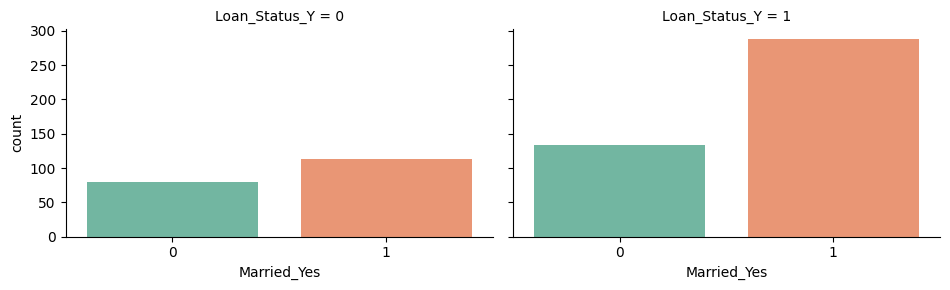

In [86]:
#Married_Yes
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Married_Yes', palette = 'Set2')

#### Educate --> YES

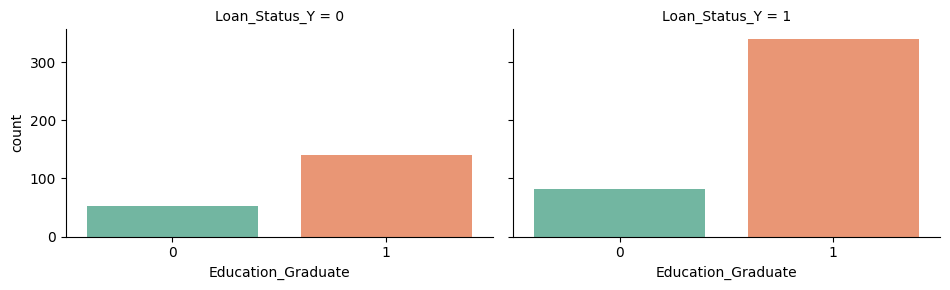

In [85]:
#Education_Graduate
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Education_Graduate',palette = 'Set2')

#### self_Employed--> NO

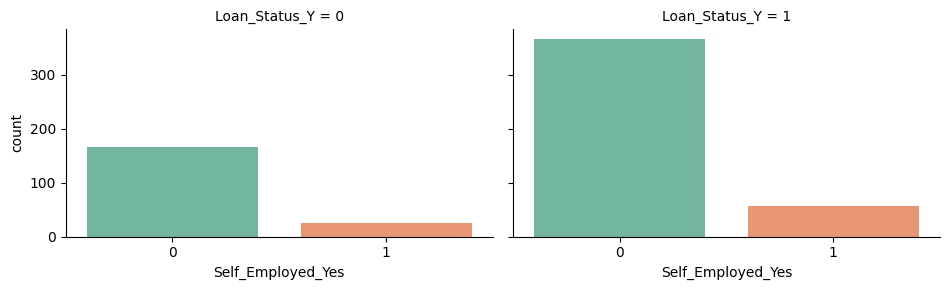

In [84]:
#Self_Employed_Yes
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Self_Employed_Yes',palette = 'Set2')

#### Property_Area_Urban--> NO

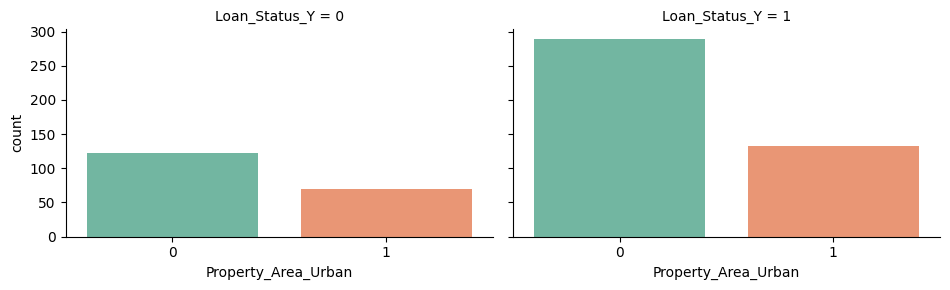

In [83]:
#Property_Area_Urban
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Property_Area_Urban',palette = 'Set2')

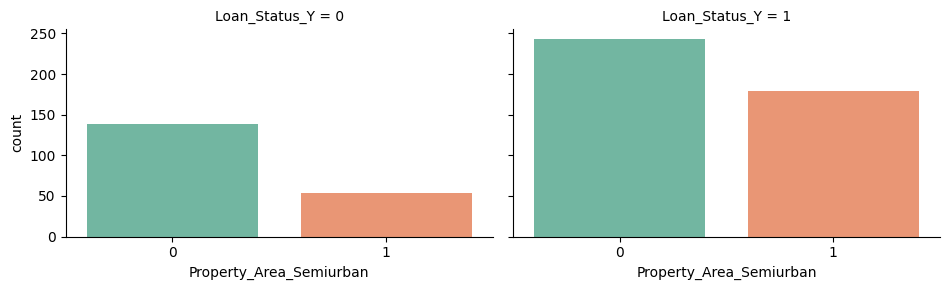

In [88]:
#Property_Area_Semiurban
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Property_Area_Semiurban',palette = 'Set2')

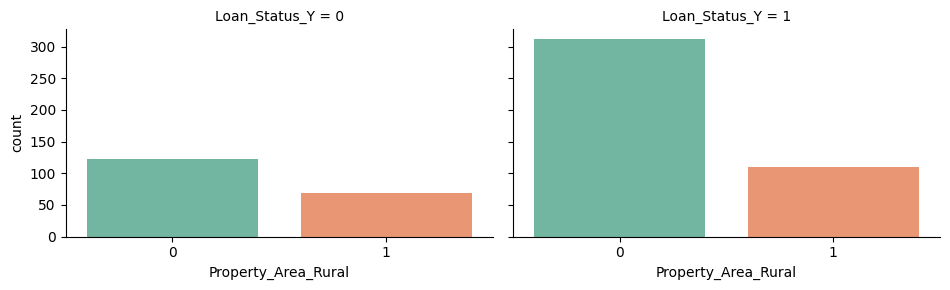

In [89]:
#Property_Area_Rural
grid= sns.FacetGrid(df_clean,col='Loan_Status_Y',aspect=1.6)
grid.map(sns.countplot,'Property_Area_Rural',palette = 'Set2')

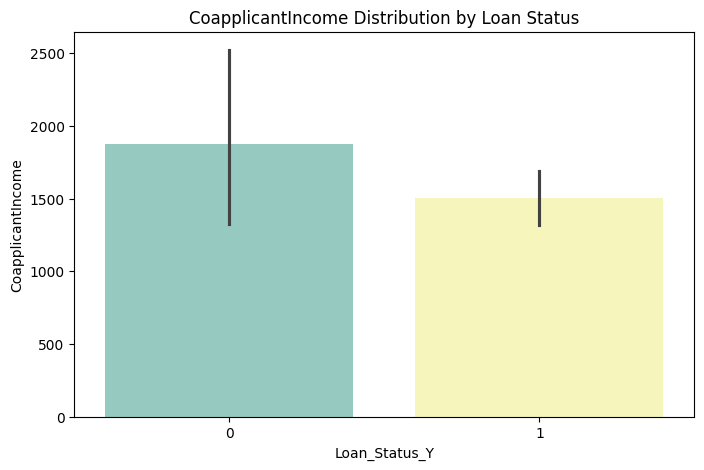

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan_Status_Y', y='CoapplicantIncome', data=df_clean, palette='Set3')
plt.title('CoapplicantIncome Distribution by Loan Status')
plt.show()

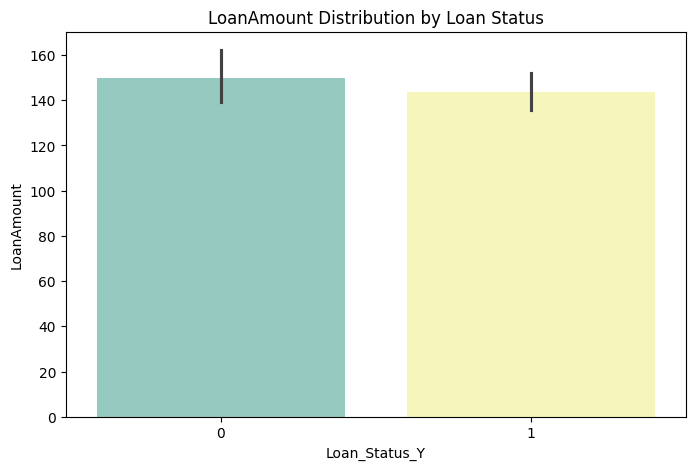

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Loan_Status_Y', y='LoanAmount', data=df_clean, palette='Set3')
plt.title('LoanAmount Distribution by Loan Status')
plt.show()

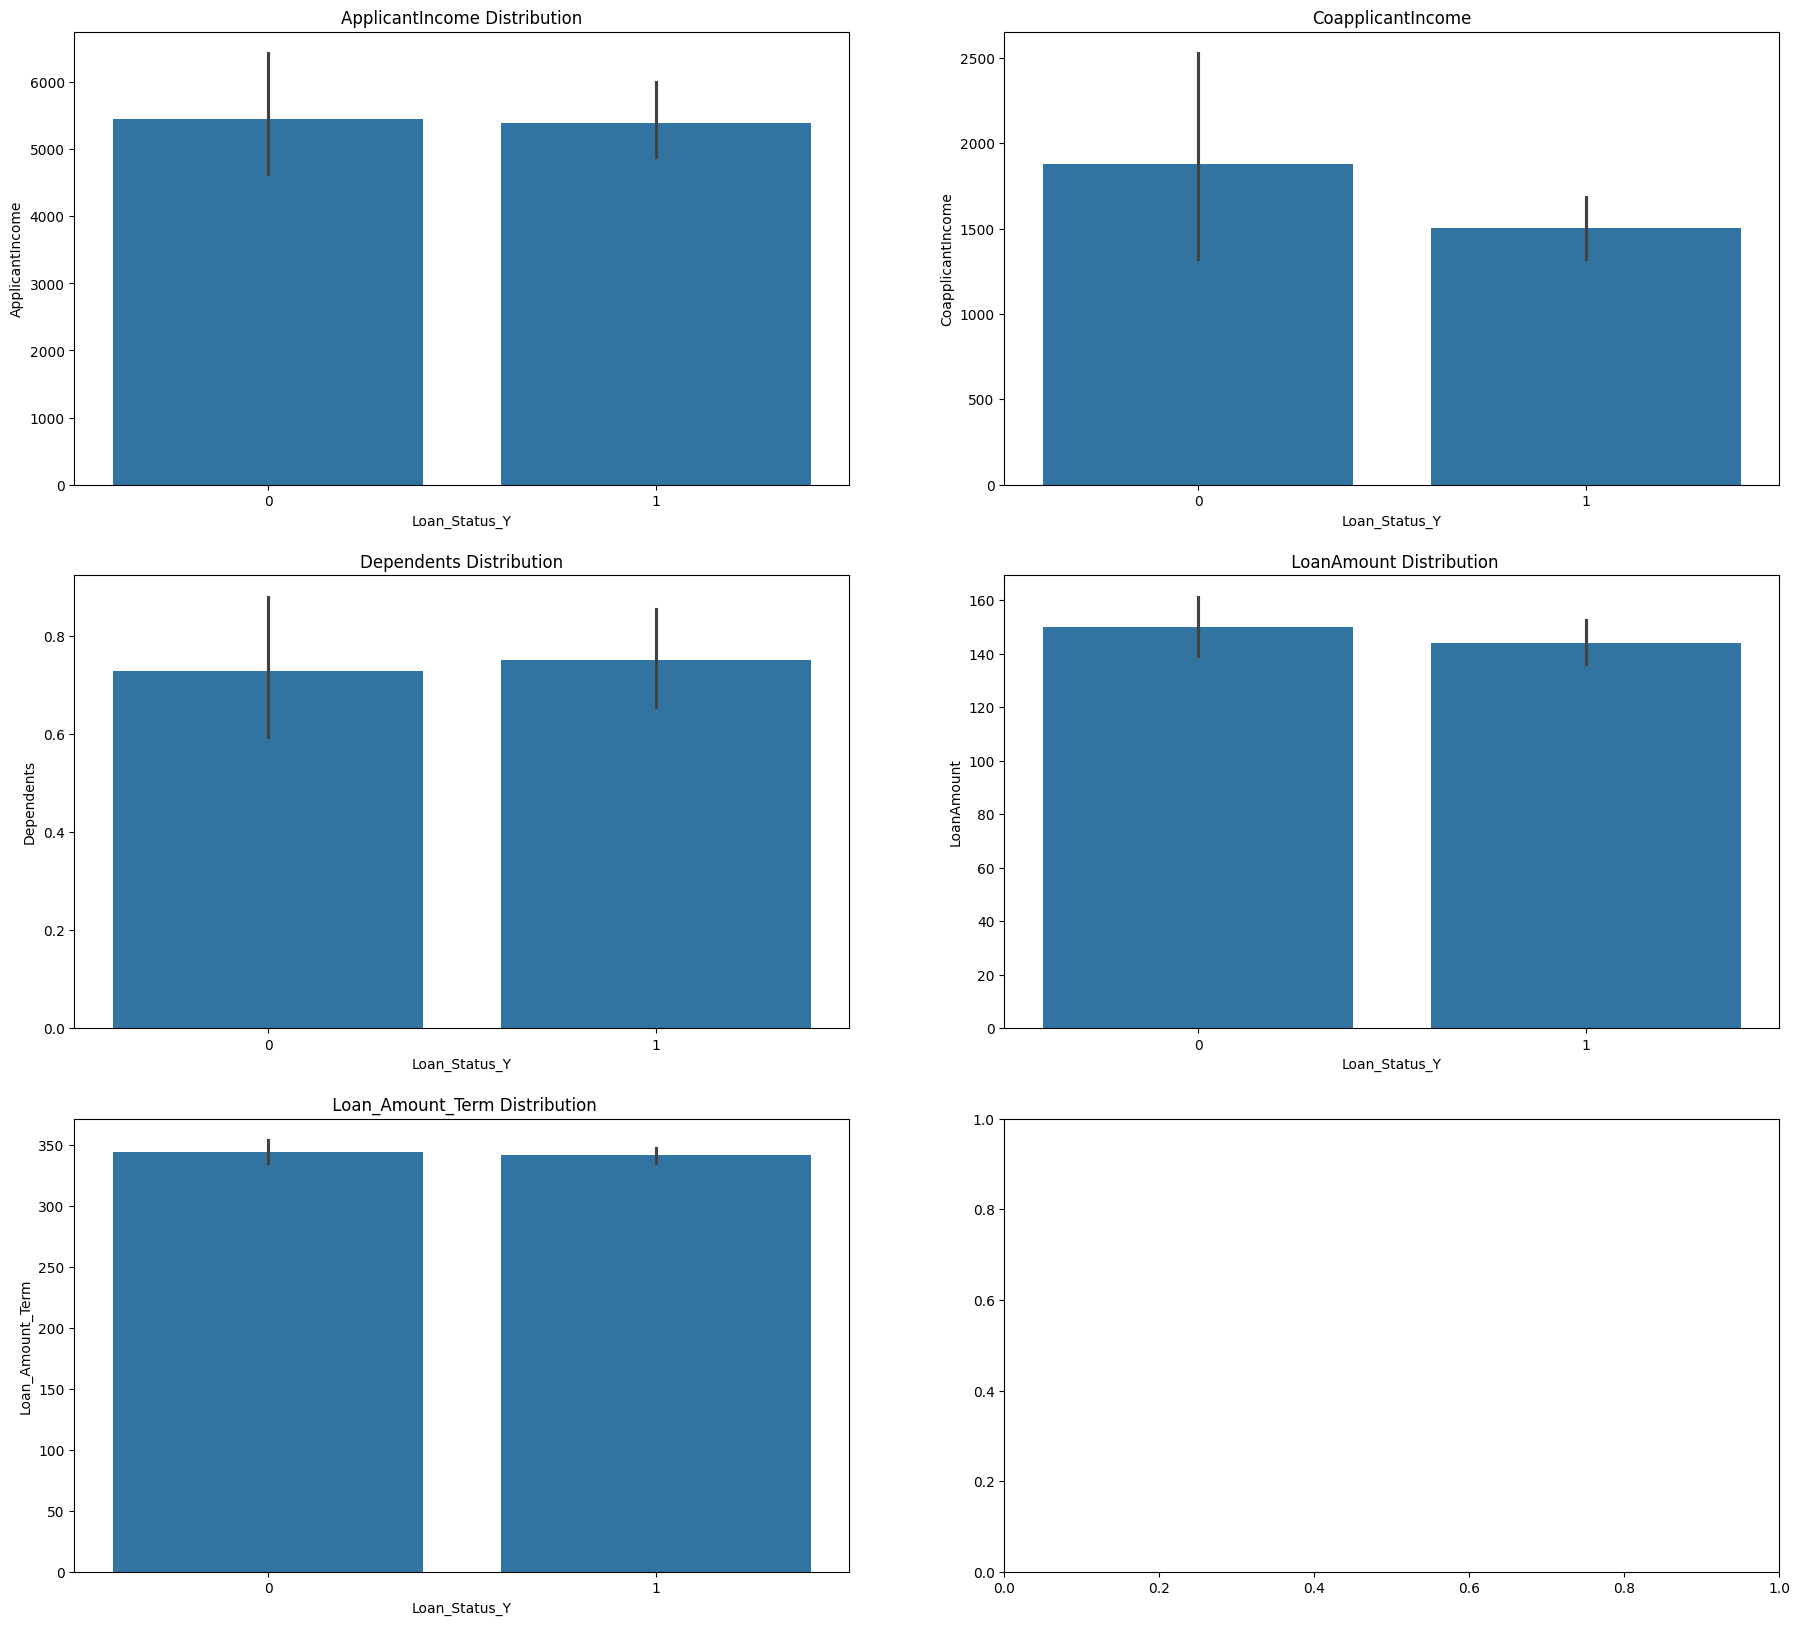

In [55]:
# Einstellen des Formats und der Größe der Zeichenfläche
fig, axes = plt.subplots(nrows=3,ncols=2)#drei Zeilen, zwei Spalten
fig.set_size_inches(22, 20)
#print(df.columns)
#print('cnt' in df.columns)

# erste Diagramm ist ein Boxplot der Verteilung der Autovermietungen.
sns.barplot(data=df_clean,x='Loan_Status_Y',y="ApplicantIncome",orient="v",ax=axes[0][0])

#Zweite Diagramm, Boxplot der saisonalen Verteilung der Zahl der Autovermietungen
sns.barplot(data=df_clean, x='Loan_Status_Y', y='CoapplicantIncome',orient="v",ax=axes[0][1])

# dritte Diagramm, eine Darstellung der zeitlichen Verteilung der Zahl der Autovermietungen
sns.barplot(data=df_clean,x='Loan_Status_Y', y='Dependents',orient="v",ax=axes[1][0])

#Vierte Diagramm, Boxplot der Wochentagsverteilung der Mietwagenzahlen
sns.barplot(data=df_clean,x='Loan_Status_Y', y='LoanAmount',orient="v",ax=axes[1][1])

#funfte Grafik zeigt die wetterbedingte Verteilung der Zahl der Autovermietungen
sns.barplot(data=df_clean,x='Loan_Status_Y', y='Loan_Amount_Term',orient="v",ax=axes[2][0])

#funfte Grafik zeigt die wetterbedingte Verteilung der Zahl der Autovermietungen
#sns.barplot(data=df_clean,x='ApplicantIncome', y= 'CoapplicantIncome',orient="v",ax=axes[2][1])

# Vier Diagramme-Achsen und Titel erstellen
axes[0][0].set(ylabel='ApplicantIncome',title="ApplicantIncome Distribution")

axes[0][1].set(xlabel='Loan_Status_Y', ylabel='CoapplicantIncome',title="CoapplicantIncome")

axes[1][0].set(xlabel='Loan_Status_Y', ylabel='Dependents',title="Dependents Distribution")

axes[1][1].set(xlabel='Loan_Status_Y', ylabel='LoanAmount',title=" LoanAmount Distribution")

axes[2][0].set(xlabel='Loan_Status_Y', ylabel='Loan_Amount_Term',title=" Loan_Amount_Term Distribution")

#axes[2][1].set( xlabel='ApplicantIncome', ylabel= 'CoapplicantIncome',title=" Income Distribution")

plt.show()